# Sorting Algos
- Sorting: Convert a gourp of unsorted series into a sorted series
- List Sorting: Convert a gourp of unsorted list into a sorted list
    - Input: list
    - Output: Sorted list
- Ascending and Descending
- Built-in function: `sort()`

### Common Sorting Algos
- Low efficiency: Bubble sort, Selection sort, Insertion sort
- High efficiency: Quick sort, Heap sort, Merge sort
- Others: Shel sort, Counting sort, Radix sort

## Bubble Sort
- Every adj num in a list, if the fomer one is greater than the latter one, swap the position
- Once a round of sorting finishes, chaos region reduces a num while ordered region increases a num
- Time Complexity: O(n^2)
![image.png](https://upload.wikimedia.org/wikipedia/commons/0/06/Bubble-sort.gif)

In [1]:
def bubble_sort(li):
    for i in range(len(li)-1):
        exchange = False
        for j in range(len(li)-i-1):
            if li[j] > li[j+1]:
                li[j],li[j+1] = li[j+1],li[j]
                exchange = True
        if not exchange:
            return

## Selection Sort
- Loop through the li, find and extract the largest number and then swap the position with the first num in chaos region and then form ordered region
- Keys: Ordered region, chaos region, the position of the min in the chaos region
- Time Complexity: O(n^2)
![image.png](https://limjkk.github.io/images/datastructure/selection%20sort/1.gif)

In [2]:
def select_sort(li):
    for i in range(len(li)):
        min_loc = i # first element in chaos region
        for j in range(i+1,len(li)):
            if li[j] < li[min_loc]:
                min_loc = j
        li[i], li[min_loc] = li[min_loc], li[i]

## Insertion Sort
- Imaging playing card game
- Originally, there is only one card on hand (ordered region)
- Take a card from the chaos region and insert into the ordered region with correct position
- Time Complexity: O(n^2)
![image.png](https://upload.wikimedia.org/wikipedia/commons/9/9c/Insertion-sort-example.gif)

In [3]:
def insert_sort(li):
    for i in range(1,len(li)):
        tmp = li[i]
        j = i-1
        while li[j] > tmp and j >= 0:
            li[j+1] = li[j]
            j -= 1
        li[j+1] = tmp

## Quick Sort
- Main idea
    - Take an element p (usually the first element) from the li and put it in the correct position
    - The li is divided into two regions by p where the left parts are all less than p while the right parts are all greater than p
    - Apply recursion to finish sorting
- Problems with Quick Sort:
    - Worst case: the li is already in a descending order when sorting ascendingly and vise versa
    - Recursion
- Time Complexity: O(nlog(n))
- Space Complexity: O(logn) for general cases. O(n) for worst case  <- since uses logn or n times of recursion
![image-2.png](https://www.tutorialspoint.com/data_structures_algorithms/images/quick_sort_partition_animation.gif)

In [4]:
def partition(li,left,right):
    tmp = li[left]
    while left < right:
        while left < right and li[right] >= tmp: #Find the num which is less than tmp from the right
            right -= 1 #Go to the left for a step
        li[left] = li[right] #Swap the position of these two nums
        
        while left < right and li[left] <= tmp: #Find the num which is greater than tmp from the left
            left += 1 #Go to the right for a step
        li[right] = li[left] #Swap the position of these two nums
    li[left] = tmp #Put the tmp to the right position
    return left

def quick_sort(li,left,right):
    if left < right: # at least two nums exist
        mid = partition(li,left,right)
        quick_sort(li,left,mid-1)
        quick_sort(li,mid+1,right)
        

## Heap Sort
### Tree and Binary Tree
- Tree
    - Tree is a data structure
    - Tree can be defined recrusively
    - Tree comprises of n nodes:
        - if n=0, the tree is empty
        - if n>0, there exsists a node called "root", nother nodes can be divided into m subsets, each subset itself is a tree
- Binary Tree
    - We will see that dealing with binary trees, a tree where each node can have no more than two children is a good way to understand trees.
    - Nodes with the same parent are called siblings. In binary tree, the left node is "left child" and the right node is "right child"
    - A binary tree in which each node has exactly zero or two children is called a **full binary tree**. In a full tree, there are no nodes with exactly one child. 
    - **A complete binary tree** is a tree, which is completely filled, with the possible exception of the bottom level, which is filled from left to right. A complete binary tree of the height h has between 2^h and 2^(h+1)-1 nodes.
    - Relationship b/t parent and 
        - the left child: `i -> 2i+1` 
        - the right child: `i -> 2i+2`
        
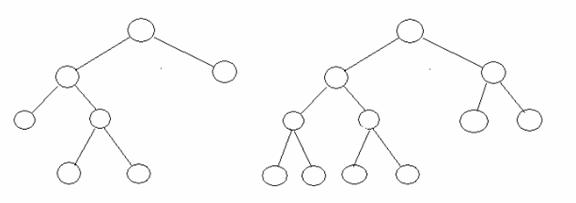
<center>Full binary tree (left) and complete binary tree (right)</center>

### Heap
- A special complete binary tree
    - Max-Heap: A complete binary tree which satisfies all the parent nodes are **greater** than their children nodes
    - Min-Heap: A complete binary tree which satisfies all the parent nodes are **less** than their children nodes
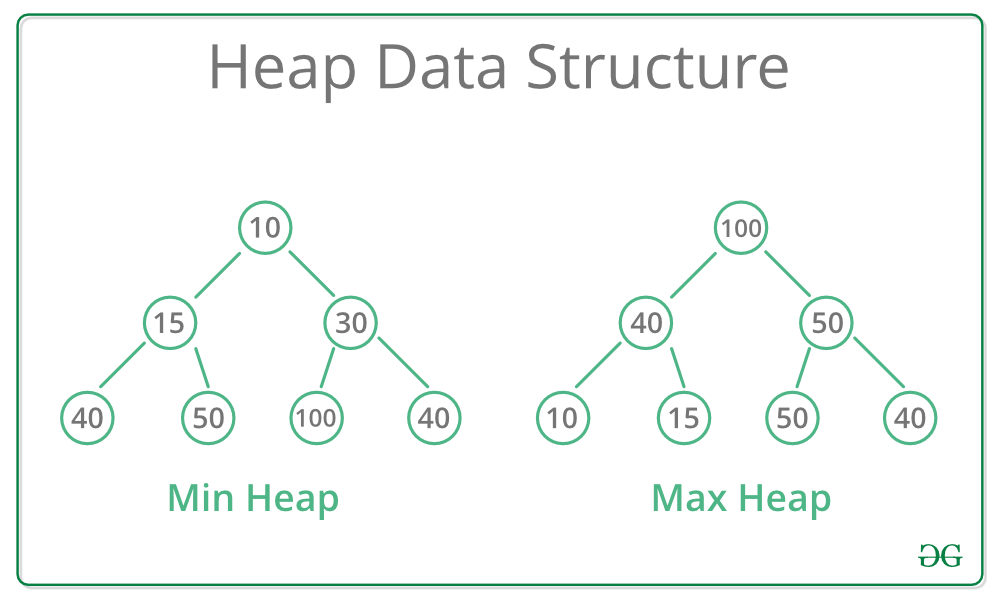

### Heap Sort Process (Max-Heap example)
1. Consctruct heap (from bottom to top)
2. The top/root of the tree is the max element
3. Swap the num in root with the last num in the tree
4. Adjust the tree
5. The root is now the second smallest element in the tree
6. repeat step 3 until the tree becomes empty

- Time Complexity: O(nlog(n))

![image-2.png](https://miro.medium.com/max/798/0*hVi2iYTIVkrm9ODv.gif)

In [5]:
def sift(li,low,high):
    '''
    param li: List
    param low: Root of the heap
    param high: The last element in the heap
    return:
    '''
    
    i = low #Pointer to the root
    j = 2*i + 1 #Pointer to the left child of the root
    tmp = li[low] #Save the heap head
    while j <= high: # j is pointing to a num
        if j+1 <= high and li[j+1] > li[j]: #If the left child exists and less than its parent
            j = j + 1 #j is the pointer to the right child
        if li[j] > tmp:
            li[i] = li[j]
            i = j
            j = 2*i + 1
        else:
            break
    li[i] = tmp

def heap_sort(li):
    n = len(li)
    for i in range((n-2)//2, -1 ,-1): # From the parent of the last child node to 0, which decrement of 1
        # i is the pointer of adjusted part's root
        sift(li,i,n-1)
    # Finishing step 1 and 4 
    # Constructing the heap
    
    for i in range(n-1,-1,-1):
        # i is the pointer to the last element in the current heap
        li[0],li[i] = li[i], li[0]
        sift(li,0,i-1) #i-1 is the new high
    

### topk problem
- Find k largest nums in a li of len(n).   (k<n)
- Approaches:
    - Sorting then partitioning   -> O(nlogn)
    - Use Bubble, selection or insertion sort -> O(kn)
    - Best solution is using heap sort: -> O(nlogk)
        - Take first k element in the li to construct a min-heap, the head is then the kth largest num
        - loop through the following li accordingly, if any remaining element in the li is less than the head, ignore the element. Otherwise, replace the head with the num and adjust heap again.
        - After running through all the elements, take out the head descendingly


In [6]:
def sift_topk(li,low,high):
    '''
    param li: List
    param low: Root of the heap
    param high: The last element in the heap
    return:
    '''
    
    i = low #Pointer to the root
    j = 2*i + 1 #Pointer to the left child of the root
    tmp = li[low] #Save the heap head
    while j <= high: # j is pointing to a num
        if j+1 <= high and li[j+1] < li[j]: #If the left child exists and less than its parent
            j = j + 1 #j is the pointer to the right child
        if li[j] < tmp:
            li[i] = li[j]
            i = j
            j = 2*i + 1
        else:
            break
    li[i] = tmp
def topk(li,k):
    heap = li[0:k]
    for i in range((k-2)//2,-1,-1):
        sift(heap,i,k-1)
    #1. construct heap
    for i in range(k,len(li)-1):
        if li[li]>heap[0]:
            heap[0] = li[i]
            sift(heap,0,k-1)
    #2. Run through all the li
    for i in range(k-1,-1,-1):
        heap[0],heap[i] = heap[i],heap[0]
        sift(heap,0,i-1)
    #3. Throw out num
    return heap
    

## Merge Sort
- Time Complexity: O(nlogn)
- Space Complexity: O(n)
### Merge
- Assume we two sorted li, how to merge then into one sorted li
- THis is called a step of mergem 
### Use of Merge
- Deposition: Divde the li smaller and smaller until it becomes single element
- Stop condition: An element is sorted
- Merge: Merge two sorted li and expand the li

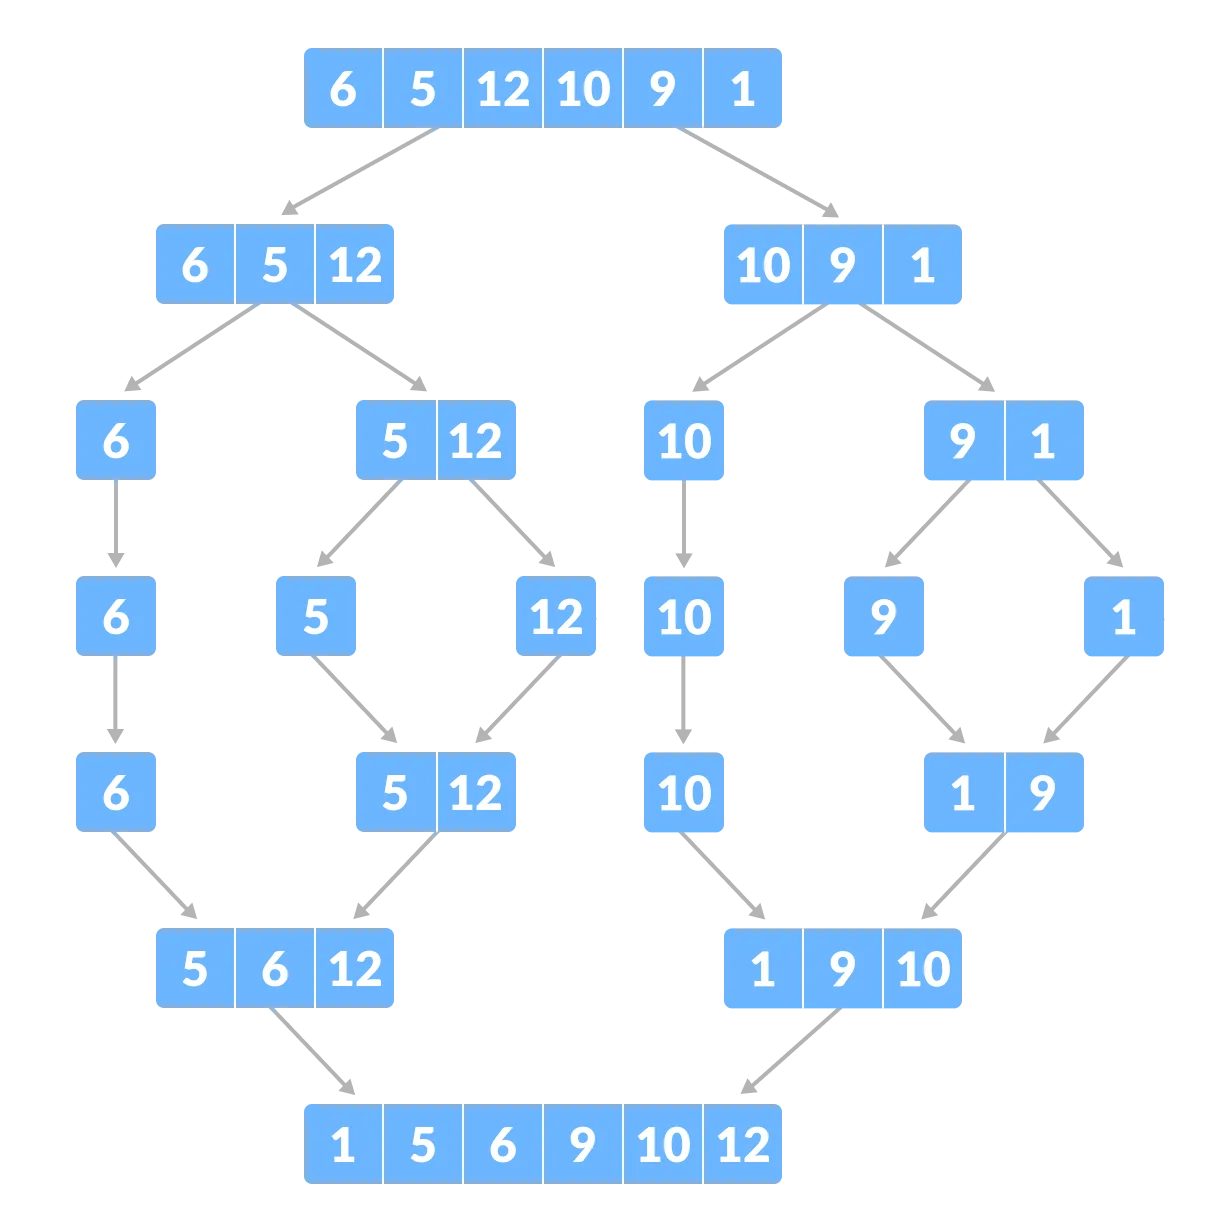

![image.png](https://upload.wikimedia.org/wikipedia/commons/c/cc/Merge-sort-example-300px.gif)


In [7]:
def merge(li,low,mid,high):
    i = low
    j = mid + 1
    ltmp = []
    while i <= mid and j <= high: #As long as there are nums in both sides
        if li[i] < li[j]:
            ltmp.append(li[i])
            i+=1
        else:
            ltmp.append(li[j])
            j+=1
    #After while finishes, one of the parts must be empty
    while i <= mid:
        ltmp.append(li[i])
        i += 1
    while j <= high:
        ltmp.append(li[j])
        j += 1
    li[low:high+1] = ltmp

def merge_sort(li,low,high):
    if low < high: #At least two elements, recursion
        mid = (low + high)//2
        merge_sort(li,low,mid)
        merge_sort(li,mid+1,high)
        merge(li,low,mid,high)

## Comparison of Quick Sort, Heap Sort, and Merge Sort

- All three algos have time complexity of O(nlogn)
- In general, with respect to speed:
    - Quick > Merge > Heap
- Pros and cons of these three algos:
    - Quick sort: Low efficiency in extreme case (the li is in descending order when sort ascendingly or vise versa
    - Merge sort: Extra space cost
    - Realatively slow comparing with the former two
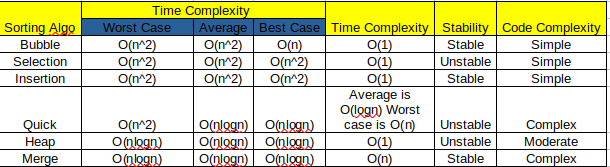

## Shell Sort -- Based on Insertion Sort
- Shell Sort is a group insertion sorting algo
- First take an int `d1 = n/2` and divide the elements into d1 groups. Every adjacent element in a group has a distance of d1. Perform insertion sorting in each group
- Take a second int `d2 = d1/2`, repeat the above step until di = 1, in another words, perform insertion sorting in each group.
- In each round, shell sort cannot make some element sorted, yet it makes the entire data get closer to sorted. In the last sorting step, it makes the data sorted
- Time Complexity: Hard to determine. But it is faster than bubble, selection, and insertion yet slower than quick, heap, and merge. It depends on how people select gap
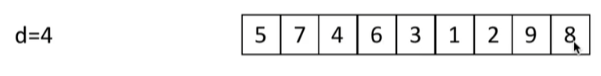
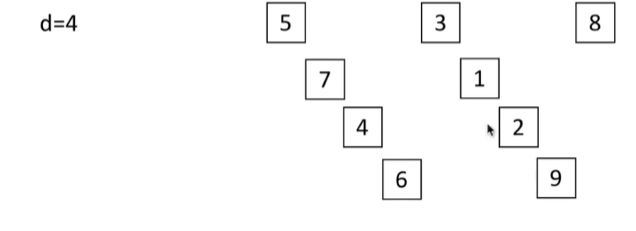
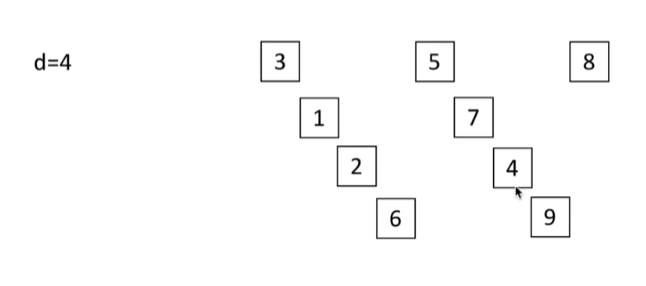
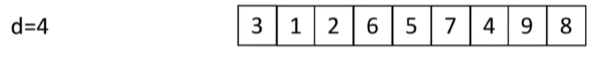
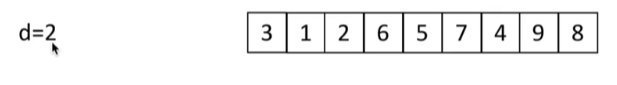
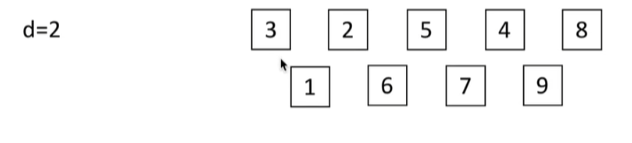
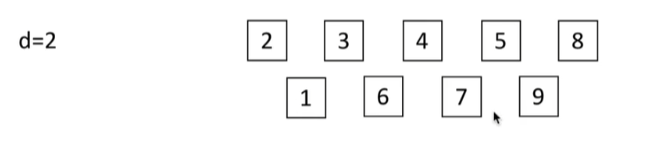
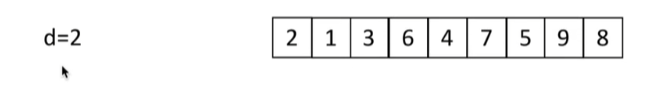
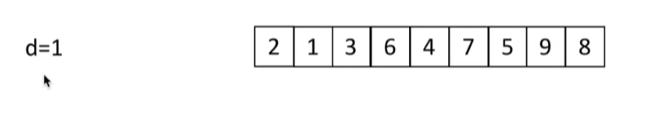
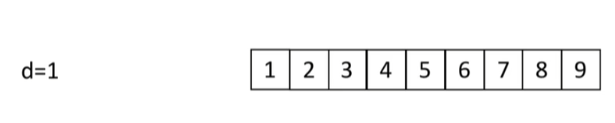

In [8]:
def insert_sort_gap(li,gap):
    for i in range(gap,len(li)):
        tmp = li[i]
        j = i-gap
        while li[j] > tmp and j >= 0:
            li[j+gap] = li[j]
            j -= gap
        li[j+gap] = tmp
def shell_sort(li):
    d = len(li) // 2
    while d>=1:
        insert_sort_gap(li,d)
        d //= 2

## Count Sort
- In a known range, count the exsitance of each num. Sort according to the distribution
- Time Complexity: O(n)
- Pros and cons:
    - pros: fast!
    - cons: memory cost, needs to know the max, hard to sort real numbers
![image.png](https://c.tenor.com/zswbYsLbYqEAAAAd/counting-sort.gif)

In [9]:
def count_sort(li,max_count=100):
    count = [0 for _ in range(max_count+1)]
    for val in li:
        count[val] +=1
    li.clear()
    for ind,val in enumerate(count):
        for i in range(val):
            li.append(ind)

## Bucket Sort
- Based on count sort. To tackle the problem when the range is huge
- Divide elements into different buckets and sort the elements in each buckets
- The performance of bucket sort depends on the data distribution. Needs to adjust strategy accordingly
- Time Complexity: O(n+k) in average, O(n^2 *k) in worst case
- Space Complexity: O(nk)
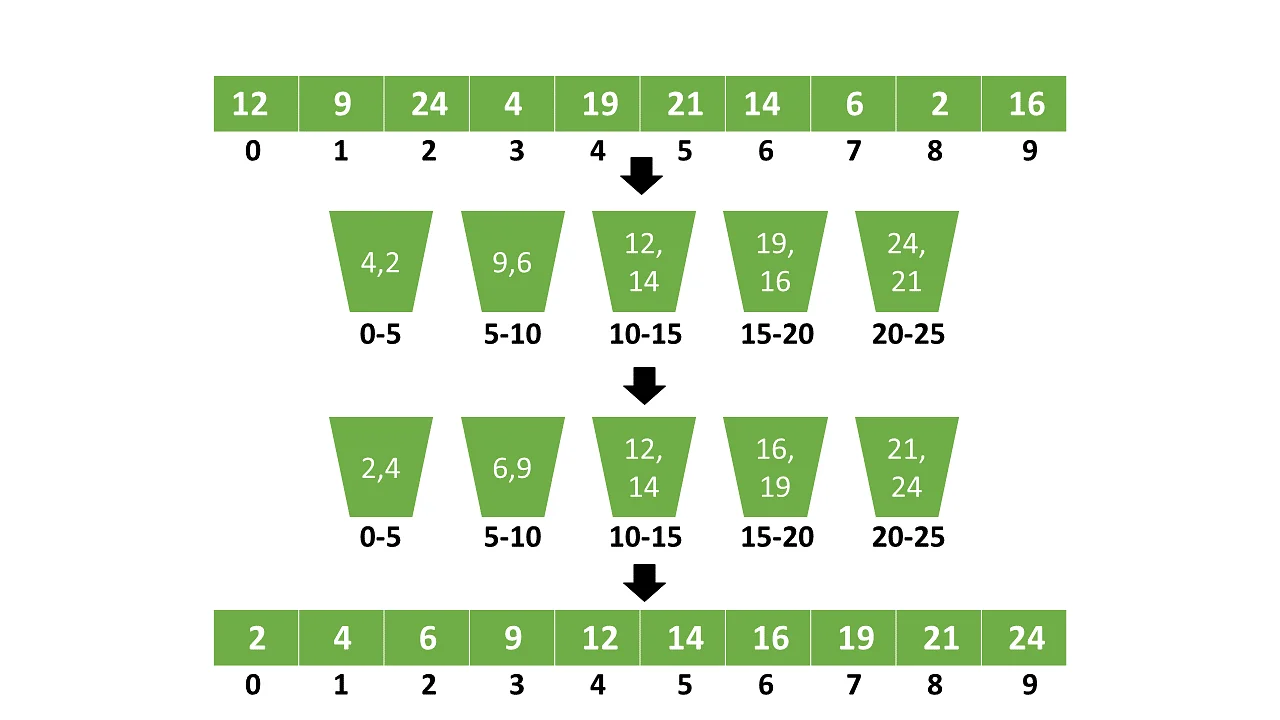

In [10]:
def bucket_sort(li,n=100,max_num=10000):
    buckets = [[] for _ in range(n)] # Generate bucket
    for var in li:
        i = min(var// (max_num // n),n-1) # i represents the bin number 
        buckets[i].append(var)# throw var into bucket
        # Sort nums inside the bin
        for j in range(len(buckets[i])-1,0,-1):
            if buckets[i][j] < buckets[i][j-1]:
                buckets[i][j],buckets[i][j-1] = buckets[i][j-1],buckets[i][j]
            else:
                break
    sorted_li = []
    for buc in buckets:
        sorted_li.extend(buc)
    return sorted_li

## Radix Sort
- Do following for each digit i where i varies from least significant digit to the most significant digit.
    - Sort input array using counting sort (or any stable sort) according to the i’th digit.
- Time Complexity: O(kn)
- Space Complexity: O(kn)
 ![image.png](https://upload.wikimedia.org/wikipedia/commons/0/04/%E5%9F%BA%E6%95%B0%E6%8E%92%E5%BA%8F.gif)

In [11]:
def radix_sort(li):
    max_num = max(li) # max num
    it = 0
    while 10**it <= max_num:
        buckets = [[] for _ in range(10)]
        for val in li:
            digit = (val // 10**it) % 10
            buckets[digit].append(val)
        # finish binning
        li.clear()
        for buc in buckets:
            li.extend(buc)
        # write number back to the bucket
        it +=1

## Comparison between Different Sorting Algos

In [12]:
import random,copy,timeit

In [13]:
num_entry = 20000
li = [random.randint(0,num_entry) for _ in range(num_entry)]
li1 = li.copy()
li2 = li.copy()
li3 = li.copy()
li4 = li.copy()
li5 = li.copy()
li6 = li.copy()
li7 = li.copy()
li8 = li.copy()
li9 = li.copy()
li10 = li.copy()
time_dis = {'Bubble Sort':0,
            'Selection Sort':0,
            'Insertion Sort':0,
            'Quick Sort':0,
            'Heap Sort':0,
            'Merge Sort':0,
            'Shell Sort':0,
            'Count Sort':0,
            'Bucket Sort':0,
            'Radix Sort':0,
           }


In [14]:
start = timeit.default_timer()
bubble_sort(li1)
stop = timeit.default_timer()
time_dis['Bubble Sort'] = stop - start

start = timeit.default_timer()
select_sort(li2)
stop = timeit.default_timer()
time_dis['Selection Sort'] = stop - start

start = timeit.default_timer()
insert_sort(li3)
stop = timeit.default_timer()
time_dis['Insertion Sort'] = stop - start

start = timeit.default_timer()
quick_sort(li4,0,len(li4)-1)
stop = timeit.default_timer()
time_dis['Quick Sort'] = stop - start

start = timeit.default_timer()
heap_sort(li5)
stop = timeit.default_timer()
time_dis['Heap Sort'] = stop - start

start = timeit.default_timer()
merge_sort(li6,0,len(li6)-1)
stop = timeit.default_timer()
time_dis['Merge Sort'] = stop - start

start = timeit.default_timer()
shell_sort(li7)
stop = timeit.default_timer()
time_dis['Shell Sort'] = stop - start

start = timeit.default_timer()
count_sort(li8,num_entry)
stop = timeit.default_timer()
time_dis['Count Sort'] = stop - start

start = timeit.default_timer()
li9 = bucket_sort(li9,1000,num_entry)
stop = timeit.default_timer()
time_dis['Bucket Sort'] = stop - start

start = timeit.default_timer()
radix_sort(li10)
stop = timeit.default_timer()
time_dis['Radix Sort'] = stop - start


In [15]:
data = time_dis
data = dict(sorted(data.items(), key=lambda item: item[1]))
names = list(data.keys())
values = list(data.values())
for i in range(len(names)):
    print(names[i],' : ',values[i],' s')

Count Sort  :  0.006271300000001645  s
Radix Sort  :  0.02744080000000082  s
Bucket Sort  :  0.03811809999999838  s
Quick Sort  :  0.04562119999999936  s
Merge Sort  :  0.05736209999999886  s
Heap Sort  :  0.07145370000000639  s
Shell Sort  :  0.08207520000000557  s
Selection Sort  :  10.428352000000004  s
Insertion Sort  :  13.4572352  s
Bubble Sort  :  29.504819599999998  s
Count Sort  :  0.006271300000001645  s
Radix Sort  :  0.02744080000000082  s
Bucket Sort  :  0.03811809999999838  s
Quick Sort  :  0.04562119999999936  s
Merge Sort  :  0.05736209999999886  s
Heap Sort  :  0.07145370000000639  s
Shell Sort  :  0.08207520000000557  s
Selection Sort  :  10.428352000000004  s
Insertion Sort  :  13.4572352  s
Bubble Sort  :  29.504819599999998  s
